<a href="https://colab.research.google.com/github/tumblingdice512/Research/blob/master/model5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [4]:
N = 10
L = 5

In [5]:
S0 = torch.sign(torch.randn(20,N))

SL = torch.sign(torch.randn(20,N))


M = S0.size()[0]
print(M)
print(N)
print(S0.shape)
print(S0[0].shape)

20
10
torch.Size([20, 10])
torch.Size([10])


In [6]:
alpha = M / N
print(alpha)

2.0


In [7]:
D = torch.Tensor([[1,2,3],[2,3,4]])
print(D)
print(D.shape)
print("M:",D.size()[0]) #M
print("N:",D.size()[1]) #N

tensor([[1., 2., 3.],
        [2., 3., 4.]])
torch.Size([2, 3])
M: 2
N: 3


In [8]:
def spin_overlap(x,y):
  spin_overlap = 0
  for i in range (len(x[0])) :

    spin_overlap = spin_overlap + torch.dot(x.T[i],y.T[i])
  return torch.abs(spin_overlap/(x.size()[0]*x.size()[1]))

print(spin_overlap(S0,S0))


tensor(1.)


In [9]:
def bond_overlap(x,y):
  bond_overlap = 0
  for i in range (len(x[0])) :

    bond_overlap = bond_overlap + torch.dot(x.T[i],y.T[i])
  return torch.abs(bond_overlap/(x.size()[0]*x.size()[1]))

In [10]:
S_a = torch.Tensor([[1,-1],[-1,1],[1,-1]])
S_b = torch.Tensor([[1,-1],[1,1],[1,1]])
print(spin_overlap(S_a,S_b))
print(spin_overlap(S_a,S_a))

tensor(0.3333)
tensor(1.)


In [11]:
a1 = torch.dot(S_a.T[0],S_b.T[0])
a2 = torch.dot(S_a.T[1],S_b.T[1])
a3 = (a1 + a2)/(2*3)
print(a3)

tensor(0.3333)


In [12]:
def MSE(t, y):
    mse = torch.mean(torch.sum(torch.square(t-y),axis = 1),axis = 0)
    return mse

In [13]:
print(MSE(S0,SL))

tensor(18.6000)


In [14]:
A = torch.Tensor([[3,5,1],[4,12,1]])
print(A**2)
A_norm = (torch.sum(torch.square(A),axis=0))**(1/2)

A_normalized = A / A_norm
A_normalized_2 = A / A_norm * (N**(1/2))

print(A_norm)

print(A_normalized)
print(A_normalized_2)

tensor([[  9.,  25.,   1.],
        [ 16., 144.,   1.]])
tensor([ 5.0000, 13.0000,  1.4142])
tensor([[0.6000, 0.3846, 0.7071],
        [0.8000, 0.9231, 0.7071]])
tensor([[1.8974, 1.2163, 2.2361],
        [2.5298, 2.9190, 2.2361]])


In [15]:
def weight_norm(x):
    x_norm = (torch.sum(torch.square(x),axis=0)**(1/2))
    return x_norm

In [16]:
w_a = torch.Tensor([[1,0,1],[1,0,0],[0,1,0]]) 
w_b = torch.Tensor([[1,0,0],[0,1,0],[0,0,1]]) 
J_a = w_a / (weight_norm(w_a)) * (3**(1/2))
J_b = w_b / (weight_norm(w_b)) * (3**(1/2))


print(J_a)
print(J_b)
print(len(J_a[0]))

print(bond_overlap(J_a,J_b))
print(bond_overlap(J_a,J_a))

tensor([[1.2247, 0.0000, 1.7321],
        [1.2247, 0.0000, 0.0000],
        [0.0000, 1.7321, 0.0000]])
tensor([[1.7321, 0.0000, 0.0000],
        [0.0000, 1.7321, 0.0000],
        [0.0000, 0.0000, 1.7321]])
3
tensor(0.2357)
tensor(1.)


In [41]:
a = torch.nn.Linear(4, 3, False,)
print(a.weight)
m = torch.nn.utils.weight_norm(a, name='weight',dim=1)
m.weight_g = torch.tensor([[N**(1/2), N**(1/2), N**(1/2), N**(1/2)]])
print(a.weight)
print(m.weight)
print(m.weight_g)
print(m.weight_v)

Parameter containing:
tensor([[ 0.2831, -0.4937,  0.1074,  0.4392],
        [ 0.3298, -0.3611,  0.1405,  0.0810],
        [-0.1814,  0.2684,  0.0226,  0.4281]], requires_grad=True)


TypeError: ignored

In [18]:
print(((0.3082)**2+(0.4463)**2+(0.0915)**2)**(1/2))

0.5500392531447187


In [19]:
class Network1(torch.nn.Module):
    def __init__(self):
        super(Network1, self).__init__()
        self.fc1_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=1)
        self.fc2_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=1)
        self.fc3_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=1)
        self.fc4_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=1)
        self.fc5_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=1)

        #torch.nn.init.normal_(self.fc1_1.weight, 0.0, 1.0)
        #torch.nn.init.normal_(self.fc2_1.weight, 0.0, 1.0)
        #torch.nn.init.normal_(self.fc3_1.weight, 0.0, 1.0)
        #torch.nn.init.normal_(self.fc4_1.weight, 0.0, 1.0)
        #torch.nn.init.normal_(self.fc5_1.weight, 0.0, 1.0)

 
    def forward(self, x):
        x = torch.tanh(self.fc1_1(x))
        S1_1 = torch.sign(x)
        x = torch.tanh(self.fc2_1(x))
        S2_1 = torch.sign(x)
        x = torch.tanh(self.fc3_1(x))
        S3_1 = torch.sign(x)
        x = torch.tanh(self.fc4_1(x))
        S4_1 = torch.sign(x)
        x = torch.tanh(self.fc5_1(x))
        S5_1 = torch.sign(x)

        return x, S1_1, S2_1, S3_1, S4_1, S5_1, self.fc1_1, self.fc2_1, self.fc3_1, self.fc4_1, self.fc5_1



In [20]:
if __name__ == '__main__':
    # 学習回数
    n_epoch = 5000
 
    # 学習結果の保存用
    history = {
        'train_loss_1': [],
    }
 
    # ネットワークを構築
    net: torch.nn.Module = Network1()
 
    optimizer = torch.optim.SGD(params=net.parameters(), lr=0.01)
 
    for n in range(n_epoch):
 
        """ Training Part"""
        loss = None
        # 学習開始 (再開)
        net.train(True)  # 引数は省略可能
 
        optimizer.zero_grad()
        output = net(S0)
        loss = MSE(output[0], SL)
        #loss_function = torch.nn.MSELoss()
        #loss = loss_function(output[0], SL)
        loss.backward()
        optimizer.step()
 
        print('EPOCH ', n + 1, ' | train_loss_1 ',loss)
        
 
        history['train_loss_1'].append(loss)


ストリーミング出力は最後の 5000 行に切り捨てられました。
EPOCH  1  | train_loss_1  tensor(10.0994, grad_fn=<MeanBackward1>)
EPOCH  2  | train_loss_1  tensor(10.0916, grad_fn=<MeanBackward1>)
EPOCH  3  | train_loss_1  tensor(10.0840, grad_fn=<MeanBackward1>)
EPOCH  4  | train_loss_1  tensor(10.0764, grad_fn=<MeanBackward1>)
EPOCH  5  | train_loss_1  tensor(10.0689, grad_fn=<MeanBackward1>)
EPOCH  6  | train_loss_1  tensor(10.0614, grad_fn=<MeanBackward1>)
EPOCH  7  | train_loss_1  tensor(10.0541, grad_fn=<MeanBackward1>)
EPOCH  8  | train_loss_1  tensor(10.0467, grad_fn=<MeanBackward1>)
EPOCH  9  | train_loss_1  tensor(10.0394, grad_fn=<MeanBackward1>)
EPOCH  10  | train_loss_1  tensor(10.0322, grad_fn=<MeanBackward1>)
EPOCH  11  | train_loss_1  tensor(10.0250, grad_fn=<MeanBackward1>)
EPOCH  12  | train_loss_1  tensor(10.0178, grad_fn=<MeanBackward1>)
EPOCH  13  | train_loss_1  tensor(10.0107, grad_fn=<MeanBackward1>)
EPOCH  14  | train_loss_1  tensor(10.0035, grad_fn=<MeanBackward1>)
EPOCH  15  | train_loss_1

{'train_loss_1': [tensor(10.0994, grad_fn=<MeanBackward1>), tensor(10.0916, grad_fn=<MeanBackward1>), tensor(10.0840, grad_fn=<MeanBackward1>), tensor(10.0764, grad_fn=<MeanBackward1>), tensor(10.0689, grad_fn=<MeanBackward1>), tensor(10.0614, grad_fn=<MeanBackward1>), tensor(10.0541, grad_fn=<MeanBackward1>), tensor(10.0467, grad_fn=<MeanBackward1>), tensor(10.0394, grad_fn=<MeanBackward1>), tensor(10.0322, grad_fn=<MeanBackward1>), tensor(10.0250, grad_fn=<MeanBackward1>), tensor(10.0178, grad_fn=<MeanBackward1>), tensor(10.0107, grad_fn=<MeanBackward1>), tensor(10.0035, grad_fn=<MeanBackward1>), tensor(9.9964, grad_fn=<MeanBackward1>), tensor(9.9893, grad_fn=<MeanBackward1>), tensor(9.9821, grad_fn=<MeanBackward1>), tensor(9.9750, grad_fn=<MeanBackward1>), tensor(9.9679, grad_fn=<MeanBackward1>), tensor(9.9608, grad_fn=<MeanBackward1>), tensor(9.9536, grad_fn=<MeanBackward1>), tensor(9.9464, grad_fn=<MeanBackward1>), tensor(9.9392, grad_fn=<MeanBackward1>), tensor(9.9320, grad_fn=<M

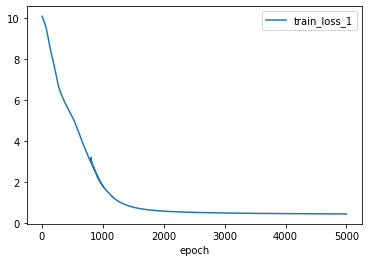

In [22]:
# 結果の出力と描画
print(history)
plt.figure()
plt.plot(range(1, n_epoch+1), history['train_loss_1'], label='train_loss_1')
plt.xlabel('epoch')
plt.legend()
plt.savefig('loss.png')



In [23]:
print(output[1])

tensor([[-1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1.],
        [ 1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.],
        [-1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.],
        [ 1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.],
        [-1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.],
        [-1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.],
        [-1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.],
        [-1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.],
        [-1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.],
        [ 1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1.],
        [-1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.],
        [-1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.],
        [ 1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.],
        [-1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.],
        [ 1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.],
        [-1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1.],
        [-1.,  1., -1., -1.,  1.,  1., -

In [24]:
print(MSE(output[5], SL))

tensor(0.4000, grad_fn=<MeanBackward1>)


In [25]:
print(output[7].weight)

tensor([[-0.0145,  0.0078, -0.4209, -0.2129,  0.2990, -0.1989, -0.0775, -0.3204,
          0.5226,  0.2967],
        [ 0.6294,  0.8115, -0.2405,  0.3788,  0.0833,  0.2127,  0.6101, -0.4289,
         -0.6056, -0.2211],
        [-0.0743, -0.9974,  0.4646, -0.0022, -0.4469, -0.2574, -0.2193,  0.1882,
          0.1672,  0.2394],
        [-0.7714, -0.2546,  0.4834,  0.4989, -0.6128, -0.5638, -0.3269, -0.3435,
         -0.2169, -0.3169],
        [ 0.1620, -1.0638, -0.2482,  0.4133,  0.2397, -0.4720,  0.1610, -0.1213,
         -0.1912,  0.5647],
        [ 0.2086,  0.2331, -0.0850, -0.6371,  0.0935,  0.2537,  0.0462, -0.0682,
          0.6513,  0.1081],
        [-0.5221, -0.2606, -0.6012,  0.2617,  0.4784, -0.9051, -0.3715,  0.0016,
         -0.5425, -0.4263],
        [-0.3021, -0.5070,  0.1927, -0.5099,  0.6632, -0.8003, -0.8304,  0.4197,
          0.2133, -0.2192],
        [-0.3512,  0.2075, -0.2920,  0.0815, -0.0408, -0.0833,  0.1336, -0.5358,
          0.5295,  0.6456],
        [ 0.2220, -

In [26]:
print(output[7].weight[:,0])

tensor([-0.0145,  0.6294, -0.0743, -0.7714,  0.1620,  0.2086, -0.5221, -0.3021,
        -0.3512,  0.2220], grad_fn=<SelectBackward>)


In [33]:
print(torch.dot(torch.tensor([-0.0145,  0.6294, -0.0743, -0.7714,  0.1620,  0.2086, -0.5221, -0.3021,
        -0.3512,  0.2220]),torch.tensor([-0.0145,  0.6294, -0.0743, -0.7714,  0.1620,  0.2086, -0.5221, -0.3021,
        -0.3512,  0.2220]))**(1/2))

tensor(1.2662)
